# Example_5_2

Conjugate gradient optimum path and convergence for ridge regression

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [1]:
from local.lib.Generation import scenarios_regression
from local.lib.utils import solver_cvx, grad_SteepestDes, grad_ConjGrad, eval_loss, plot_surface
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#!pip install cvxpy

In [ ]:
import cvxpy as cp

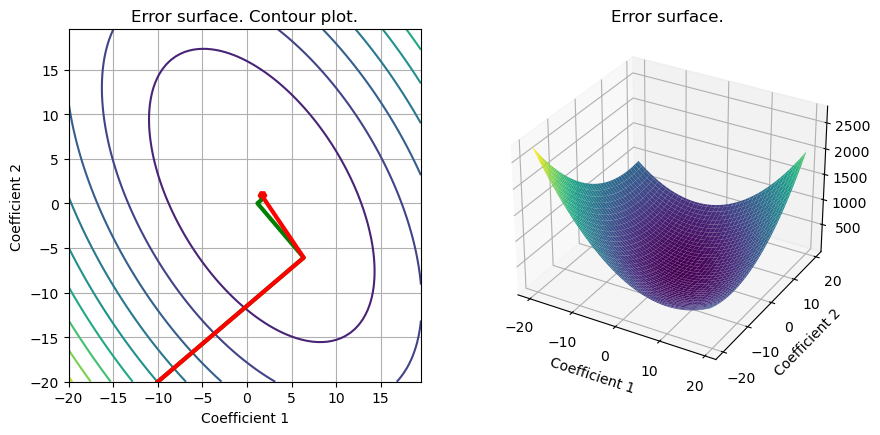

In [8]:
# Loading scenarios
# ===========================
scenario=1
data_reg, set_up =scenarios_regression(scenario)

# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.pnorm(X @ w - Y, p=2)**2
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
loss_LS_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)
grad_LS_L2 = lambda n, X, Y, w, lambd: (2/n)*X.T@(X @ w - Y) + lambd * w
Hess_LS_L2 = lambda n, X, Y, w, lambd: (2/n)*X.T@X + lambd * np.eye(X.shape[1])

# Different ways to solve theoreticaly the LS
#=========================================
# Solution of the empirical risk using CVX
w_cvx=solver_cvx(set_up,loss_LS_L2);

# Steepets descent
out_sd =grad_SteepestDes(set_up,grad_LS_L2, Hess_LS_L2);

# Conjugate gradient
out_cg =grad_ConjGrad(set_up,grad_LS_L2, Hess_LS_L2);

# We plot the surface
S = plot_surface(set_up,loss_LS_L2,w_cvx,include_grad=True, grad=np.stack((out_sd,out_cg), axis=0), color=['green','red']);

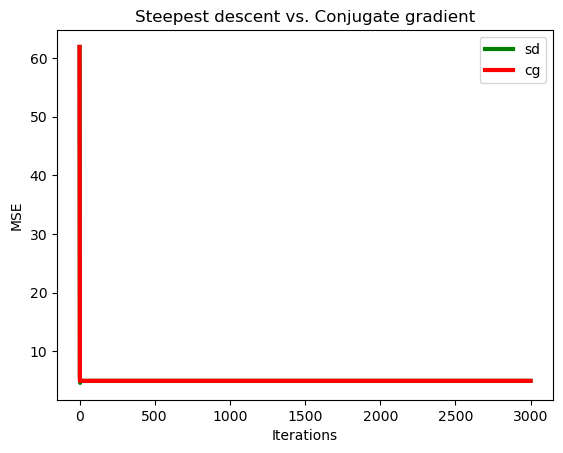

In [10]:
# Plot of learning curves
w = cp.Variable(w_cvx.shape[0])
w.value = w_cvx
loss_opt=loss_LS_L2(set_up['Niter_train'],set_up['Xtrain'][:,0:set_up['d']+1],set_up['ytrain'][:,0],w_cvx,set_up['Lambda']).value
loss_sd=eval_loss(out_sd,set_up,loss_LS);
loss_cg=eval_loss(out_cg,set_up,loss_LS);

plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_sd-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)+np.finfo(float).eps),color='g', linewidth = 3, label = 'sd')
plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_cg-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)+np.finfo(float).eps),color='r', linewidth = 3, label = 'cg')
plt.grid
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Steepest descent vs. Conjugate gradient')
plt.show()